# Image Pre-Processing

In [2]:
# Download image files
! curl -O https://challenge.blob.core.windows.net/challengefiles/gear_images.zip
# Extract to the DBFS file system mount point
! unzip -o gear_images.zip -d '/dbfs'

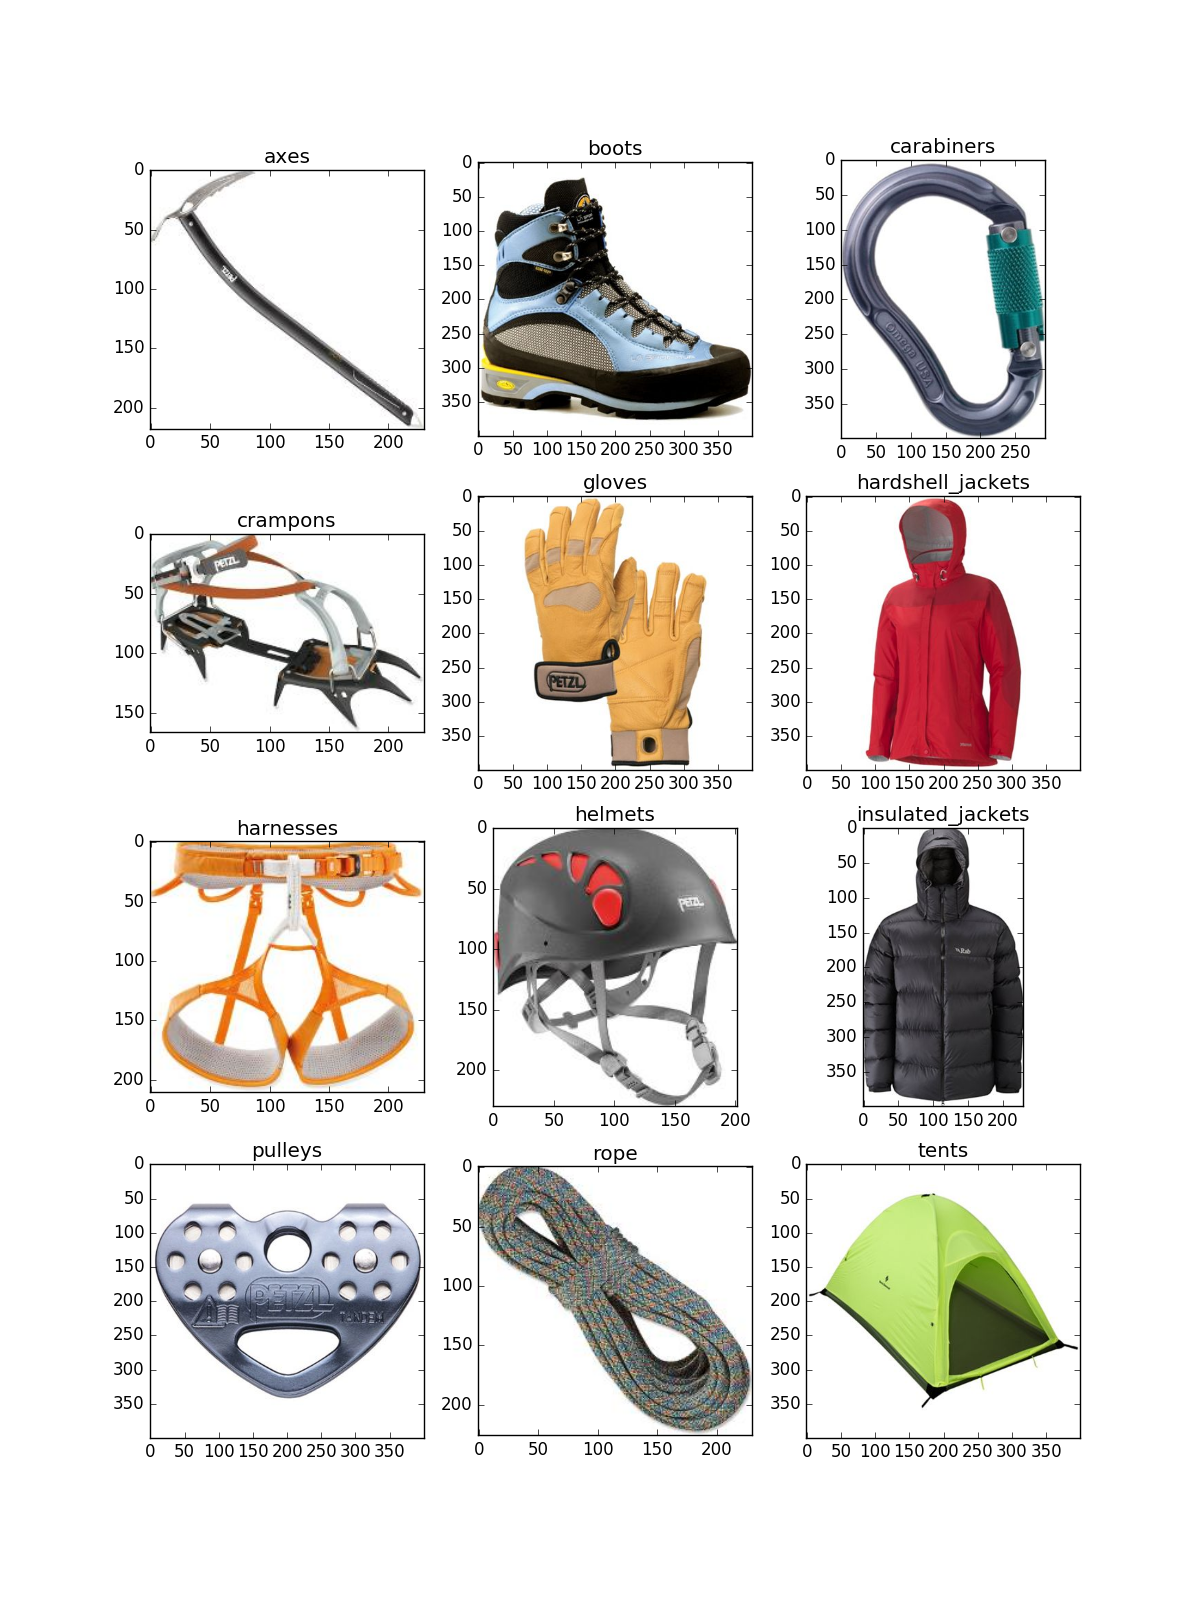

In [3]:
# Display first image in each folder
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


imgdir = os.path.join('/dbfs','gear_images')

fig = plt.figure(figsize=(12, 16))

dir_num = 0
for root, folders, filenames in os.walk(imgdir):
    for folder in folders:
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile = os.path.join(root,folder, file)
        img = Image.open(imgFile)
        a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        imgplot = plt.imshow(img)
        a.set_title(folder)
        dir_num = dir_num + 1
        
# Databricks notebooks don't support matplotlib inline, so use display() to show the plot
display(fig)

In [4]:
# Helper function to resize image

def resize_image(img, size): 
    from PIL import Image, ImageOps 
    
    # Convert RGBA images to RGB
    if np.array(img).shape[2] == 4:
        img = img.convert('RGB')
        
    # resize the image
    img.thumbnail(size, Image.ANTIALIAS)
    newimg = Image.new("RGB", size, (255, 255, 255))
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return newimg
   

In [5]:
# Create resized copies of all of the source images
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

size = (128,128)

indir = os.path.join('/dbfs','gear_images')
outdir = os.path.join('/dbfs','resized_images')
if os.path.exists(outdir):
    shutil.rmtree(outdir)
    
for root, dirs, filenames in os.walk(indir):
    for d in dirs:
        print('processing folder ' + d)
        saveFolder = os.path.join(outdir,d)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        files = os.listdir(os.path.join(root,d))
        for f in files:
            imgFile = os.path.join(root,d, f)
            print("reading " + imgFile)
            img = Image.open(imgFile)
            
            # process image
            proc_img = resize_image(img, size)
            saveAs = os.path.join(saveFolder, 'resized_' + f)
            print("writing " + saveAs)
            proc_img.save(saveAs)
            
            

processing folder axes
reading /dbfs/gear_images/axes/100172.jpeg
writing /dbfs/resized_images/axes/resized_100172.jpeg
reading /dbfs/gear_images/axes/10036053x1012980_zm.jpeg
writing /dbfs/resized_images/axes/resized_10036053x1012980_zm.jpeg
reading /dbfs/gear_images/axes/10045714_zm.jpeg
writing /dbfs/resized_images/axes/resized_10045714_zm.jpeg
reading /dbfs/gear_images/axes/100937.jpeg
writing /dbfs/resized_images/axes/resized_100937.jpeg
reading /dbfs/gear_images/axes/100938.jpeg
writing /dbfs/resized_images/axes/resized_100938.jpeg
reading /dbfs/gear_images/axes/10101173x1012980_zm.jpeg
writing /dbfs/resized_images/axes/resized_10101173x1012980_zm.jpeg
reading /dbfs/gear_images/axes/10188438x1011898_zm.jpeg
writing /dbfs/resized_images/axes/resized_10188438x1011898_zm.jpeg
reading /dbfs/gear_images/axes/10189964_zm.jpeg
writing /dbfs/resized_images/axes/resized_10189964_zm.jpeg
reading /dbfs/gear_images/axes/10189970_zm.jpeg
writing /dbfs/resized_images/axes/resized_10189970_zm.jpeg
reading /dbfs/gear_images/axes/10189971_zm.jpeg
writing /dbfs/resized_images/axes/resized_10189971_zm.jpeg
reading /dbfs/gear_images/axes/10215531x1028317_zm.jpeg
writing /dbfs/resized_images/axes/resized_10215531x1028317_zm.jpeg
reading /dbfs/gear_images/axes/10258915x1152209_zm.jpeg
writing /dbfs/resized_images/axes/resized_10258915x1152209_zm.jpeg
reading /dbfs/gear_images/axes/10260981_zm.jpeg
writing /dbfs/resized_images/axes/resized_10260981_zm.jpeg
reading /dbfs/gear_images/axes/10260983_zm.jpeg
writing /dbfs/resized_images/axes/resized_10260983_zm.jpeg
reading /dbfs/gear_images/axes/10285571x1013345_zm.jpeg
writing /dbfs/resized_images/axes/resized_10285571x1013345_zm.jpeg
reading /dbfs/gear_images/axes/10285573x1013345_zm.jpeg
writing /dbfs/resized_images/axes/resized_10285573x1013345_zm.jpeg
reading /dbfs/gear_images/axes/10291030_zm.jpeg
writing /dbfs/resized_images/axes/resized_10291030_zm.jpeg
reading /dbfs/gear_images/axes/10291102_zm.jpeg
writing /dbfs/resized_images/axes/resized_10291102_zm.jpeg
reading /dbfs/gear_images/axes/10321075_zm.jpeg
writing /dbfs/resized_images/axes/resized_10321075_zm.jpeg
reading /dbfs/gear_images/axes/10331860x1078795_zm.jpeg
writing /dbfs/resized_images/axes/resized_10331860x1078795_zm.jpeg
reading /dbfs/gear_images/axes/10331871x1010938_zm.jpeg
writing /dbfs/resized_images/axes/resized_10331871x1010938_zm.jpeg
reading /dbfs/gear_images/axes/10347141x1152209_zm.jpeg
writing /dbfs/resized_images/axes/resized_10347141x1152209_zm.jpeg
reading /dbfs/gear_images/axes/10351594_zm.jpeg
writing /dbfs/resized_images/axes/resized_10351594_zm.jpeg
reading /dbfs/gear_images/axes/10351595_zm.jpeg
writing /dbfs/resized_images/axes/resized_10351595_zm.jpeg
reading /dbfs/gear_images/axes/10351608_zm.jpeg
writing /dbfs/resized_images/axes/resized_10351608_zm.jpeg
reading /dbfs/gear_images/axes/10353611_zm.jpeg
writing /dbfs/resized_images/axes/resized_10353611_zm.jpeg
reading /dbfs/gear_images/axes/10353612_zm.jpeg
writing /dbfs/resized_images/axes/resized_10353612_zm.jpeg
reading /dbfs/gear_images/axes/10353624_zm.jpeg
writing /dbfs/resized_images/axes/resized_10353624_zm.jpeg
reading /dbfs/gear_images/axes/10353625_zm.jpeg
writing /dbfs/resized_images/axes/resized_10353625_zm.jpeg
reading /dbfs/gear_images/axes/107254.jpeg
writing /dbfs/resized_images/axes/resized_107254.jpeg
reading /dbfs/gear_images/axes/113409.jpeg
writing /dbfs/resized_images/axes/resized_113409.jpeg
reading /dbfs/gear_images/axes/113410.jpeg
writing /dbfs/resized_images/axes/resized_113410.jpeg
reading /dbfs/gear_images/axes/1312778_000_main.jpg
writing /dbfs/resized_images/axes/resized_1312778_000_main.jpg
reading /dbfs/gear_images/axes/1312779_000_main.jpg
writing /dbfs/resized_images/axes/resized_1312779_000_main.jpg
reading /dbfs/gear_images/axes/1312786_004_main.jpg
writing /dbfs/resized_images/axes/resized_1312786_004_main.jpg
reading /dbfs/gear_images/axes/1312788_004_main.jpg
writing /dbfs/resized_images/axes/resized_1312788_004_ma

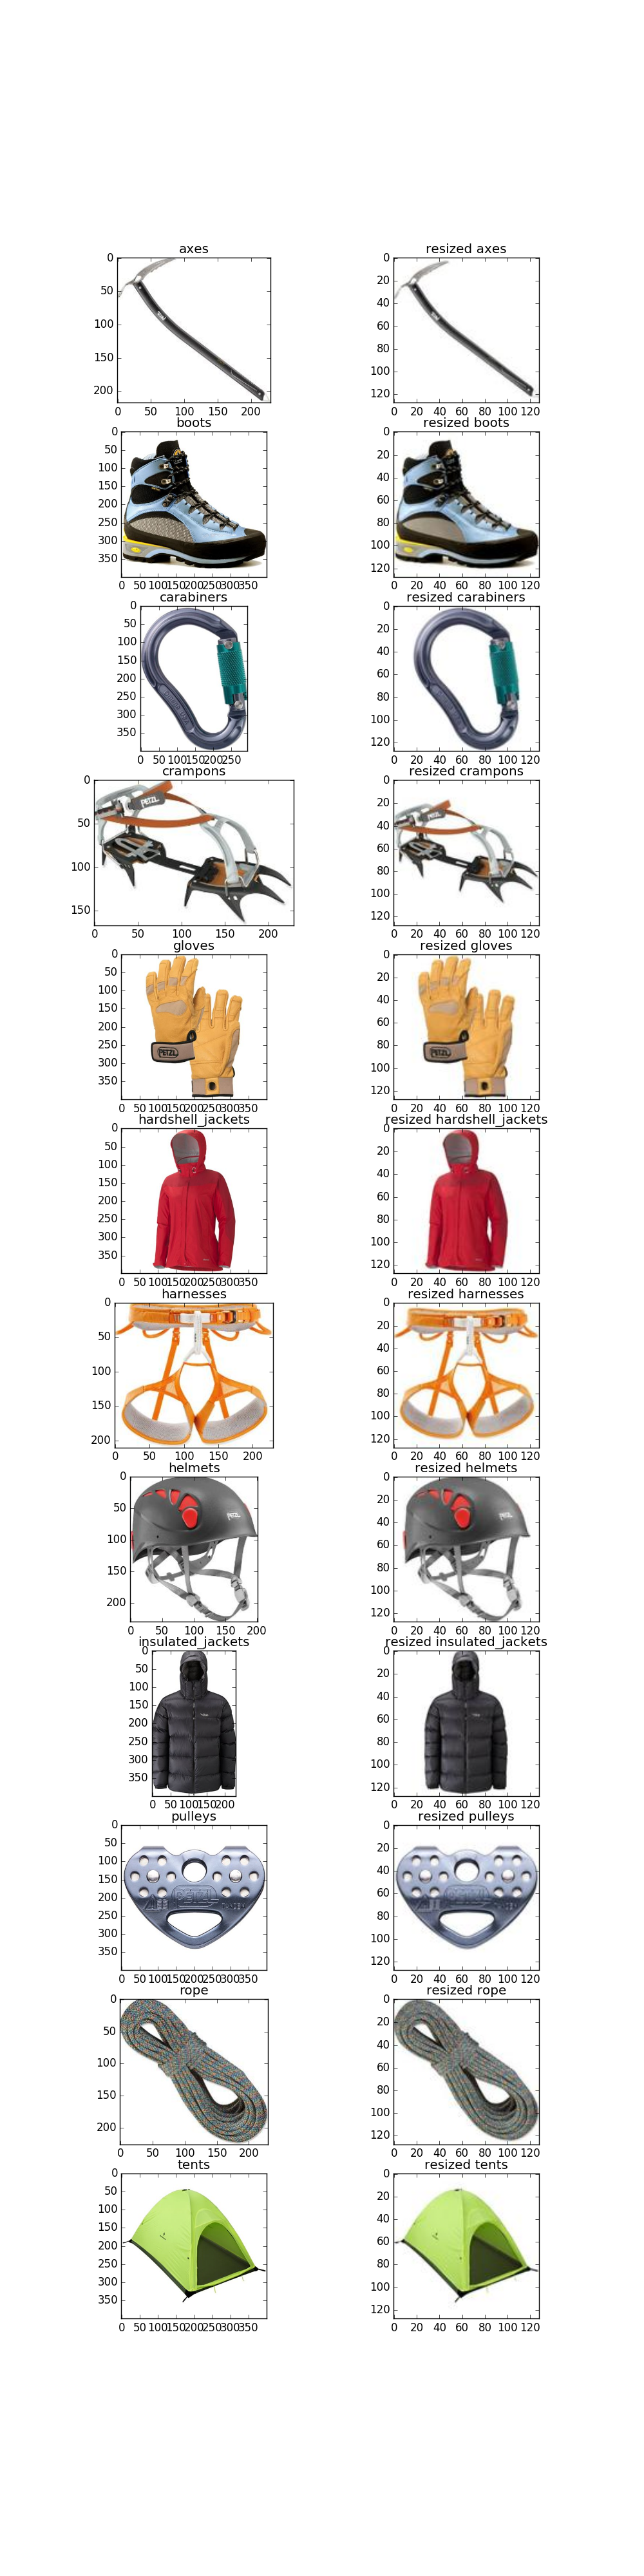

In [6]:
# Plot first image in each folder with its resized version
fig = plt.figure(figsize=(10, 40))

img_num = 1
for root, folders, filenames in os.walk(indir):
    for folder in folders:
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile1 = os.path.join(indir,folder, file)
        img1 = Image.open(imgFile1)
        a=fig.add_subplot(len(folders), 2, img_num)
        imgplot = plt.imshow(img1)
        img_num = img_num + 1
        imgFile2 = os.path.join(outdir,folder, 'resized_' + file)
        a.set_title(folder)
        img2 = Image.open(imgFile2)
        b=fig.add_subplot(len(folders), 2, img_num)
        imgplot = plt.imshow(img2)
        b.set_title('resized ' + folder)
        img_num = img_num + 1
display(fig)